In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv("/kaggle/input/httpparamsdataset/payload_full.csv")
df

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm
...,...,...,...,...
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",63,xss,anom
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",66,xss,anom
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",65,xss,anom
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",63,xss,anom


In [21]:
df2 = pd.read_csv("/kaggle/input/httpparamsdataset/payload_test.csv")
df2

,payload,length,attack_type,label
0,40184,5,norm,norm
1,nuda drudes,11,norm,norm
2,"c/ del ferrocarril, 152,",24,norm,norm
3,2070765320009143,16,norm,norm
4,1902,4,norm,norm
...,...,...,...,...
10350,"geturl(""javascript:alert('xss')"")",33,xss,anom
10351,"<xml id=xss src=""http://ha.ckers.org/xsstest.x...",61,xss,anom
10352,<? echo('<scr)';,16,xss,anom
10353,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",66,xss,anom


In [22]:
df3 = pd.read_csv("/kaggle/input/httpparamsdataset/payload_train.csv")
df3

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,1442431887503330,16,norm,norm
3,nue37,5,norm,norm
4,tufts3@joll.rs,14,norm,norm
...,...,...,...,...
20707,"<!--#exec cmd=""/bin/echo '<script src'""--><!--...",110,xss,anom
20708,"<head><meta http-equiv=""content-type"" content=...",127,xss,anom
20709,"<script a="">"" id=xss src=""http://ha.ckers.org/...",63,xss,anom
20710,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",65,xss,anom


In [23]:
df3 = pd.read_csv("/kaggle/input/httpparamsdataset/payload_test_lexical.csv")
df3

,payload,length,attack_type,label
0,"select prod_subcategory_desc as category, cale...",252,sql-syntax,anom
1,"select prod_subcategory_desc as category, cale...",253,sql-syntax,anom
2,"select prod_subcategory_desc as subcategory, c...",282,sql-syntax,anom
3,"select prod_subcategory_desc as subcategory, c...",256,sql-syntax,anom
4,"select prod_subcategory_desc as subcategory, c...",268,sql-syntax,anom
...,...,...,...,...
1101,"btw, ofc 'i have installed the right header ve...",146,norm,norm
1102,warning: unable to open /dev/sr0 read-write (r...,152,norm,norm
1103,"ok i created those 2 files, so it should work ...",55,norm,norm
1104,"you tagged this with `ffmpeg`, but it appears ...",107,norm,norm


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

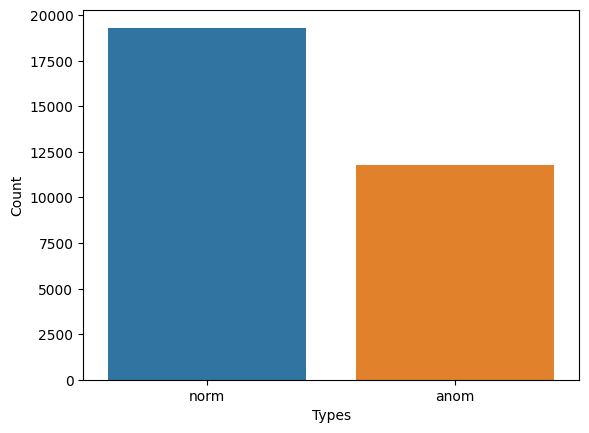

In [25]:
count = df['label'].value_counts()

# Create a bar plot
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()

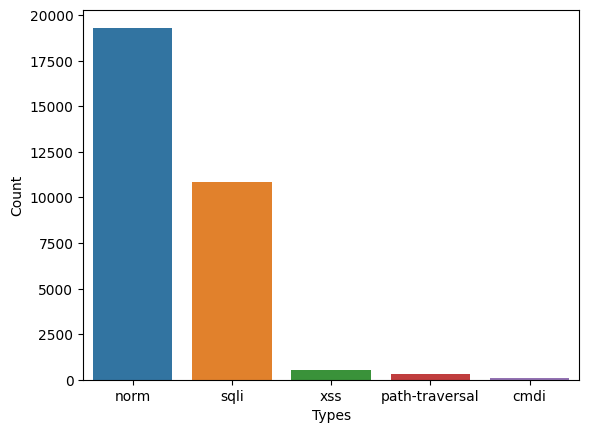

In [26]:
count = df['attack_type'].value_counts()

# Create a bar plot
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()

In [27]:
df['attack_type'].unique()


array(['norm', 'sqli', 'xss', 'cmdi', 'path-traversal'], dtype=object)

In [28]:
#rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
#data['Category'] = data['type']
#data = data.replace(rem)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['attack_label'] = le.fit_transform(df['attack_type'])
df

,payload,length,attack_type,label,attack_label
0,c/ caridad s/n,14,norm,norm,1
1,"campello, el",12,norm,norm,1
2,40184,5,norm,norm,1
3,1442431887503330,16,norm,norm,1
4,nue37,5,norm,norm,1
...,...,...,...,...,...
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",63,xss,anom,4
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",66,xss,anom,4
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",65,xss,anom,4
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",63,xss,anom,4


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [31]:
cv = CountVectorizer()
X = cv.fit_transform(df['payload'])
y = df['attack_label']

In [32]:
X.shape

(31067, 31829)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [50]:
def results(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    #confuse_matrix = confusion_matrix(y_true,y_pred)
    precision = precision_score(y_true,y_pred,average='weighted')
    recall = recall_score(y_true,y_pred,average='weighted')
    f1 = f1_score(y_true,y_pred,average='weighted')
    overall_score = (accuracy + precision + recall + f1)/4
    print("Model accuracy score : ", {accuracy})
    #print("Model confuse_matrix score : ", {confuse_matrix})
    print("Model precision score : ", {precision})
    print("Model recall score : ", {recall})
    print("Model f1 score : ", {f1})
    print("Model overall_score score : ", {overall_score})

In [38]:
cl_rf = RFR(n_estimators = 100, random_state = 42)
cl_rf.fit(X_train, y_train)
y_pred = cl_rf.predict(X_test)

In [51]:
results(y_test,y_pred)

Model accuracy score :  {0.9991953653041519}
Model precision score :  {0.9991980526397639}
Model recall score :  {0.9991953653041519}
Model f1 score :  {0.9991944661609555}
Model overall_score score :  {0.9991958123522557}
